<a href="https://colab.research.google.com/github/Captmoonshot/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/Copy_of_LS_DS_141_Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 141
## Statistics, Probability, and Inference

## Prepare - examine what's available in SciPy

As we delve into statistics, we'll be using more libraries - in particular the [stats package from SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

In [0]:
from scipy import stats
dir(stats)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binned_statistic',
 '_constants',
 '_continuous_distns',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_multivariate',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 'absolute_import',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'argus',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_contingency',
 'chisquare',
 'circmean',
 'circstd',
 'circvar',
 'combine_pvalues',
 'contingency',
 'cosine',
 'crystalball',
 'cumfreq',
 'describe',
 'dgamma',
 'dirichlet',
 'distributions',
 'division',
 'dlaplace',
 'dweibull',
 'energy_dist

In [0]:
# As usual, lots of stuff here! There's our friend, the normal distribution
norm = stats.norm()
print(norm.mean())
print(norm.std())
print(norm.var())

0.0
1.0
1.0


In [0]:
# And a new friend - t
t1 = stats.t(5)  # 5 is df "shape" parameter
print(t1.mean())
print(t1.std())
print(t1.var())

0.0
1.2909944487358056
1.6666666666666667


![T distribution PDF with different shape parameters](https://upload.wikimedia.org/wikipedia/commons/4/41/Student_t_pdf.svg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/Student's_t-distribution#/media/File:Student_t_pdf.svg))*

The t-distribution is "normal-ish" - the larger the parameter (which reflects its degrees of freedom - more input data/features will increase it), the closer to true normal.

In [0]:
t2 = stats.t(30)  # Will be closer to normal
print(t2.mean())
print(t2.std())
print(t2.var())

0.0
1.0350983390135313
1.0714285714285714


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal in the limit (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

History sidenote - this is "Student":

![William Sealy Gosset](https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/File:William_Sealy_Gosset.jpg))*

His real name is William Sealy Gosset, and he published under the pen name "Student" because he was not an academic. He was a brewer, working at Guinness and using trial and error to determine the best ways to yield barley. He's also proof that, even 100 years ago, you don't need official credentials to do real data science!

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test.

In [0]:
# TODO - during class, but please help!

## Assignment - apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [87]:
import pandas as pd
import numpy as np
import scipy



# TODO - your code here!
names = ['Political_Party', 'handicapped_infants', 'water_project_cost_sharing', 'adoption_of_the_budget', 'physician_fee_freeze',
        'el_salvadore_aid', 'religious_groups_in_schools', 'anti_satellite_test_ban', 'aid_to_contras', 'mx_missile',
        'immigration', 'synfuels_corporation_cutback', 'education_spending', 'superfund_right_to_sue', 'crime',
        'duty_free_exports', 'export_administration_act']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None, names=names, na_values='?')
df.head()


,Political_Party,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget,physician_fee_freeze,el_salvadore_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


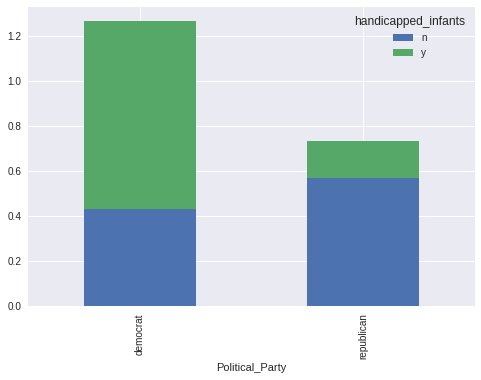

In [88]:
pd.crosstab(df.Political_Party, df.handicapped_infants, normalize='columns').plot(kind='bar', stacked=True)

In [89]:
# stats.ttest_ind(rvs1, rvs3)

handicapped_infants_republican = df[df['Political_Party']=='republican']
handicapped_infants_republican = handicapped_infants_republican[['Political_Party', 'handicapped_infants']]
handicapped_infants_republican.head()

,Political_Party,handicapped_infants
0,republican,n
1,republican,n
7,republican,n
8,republican,n
10,republican,n


In [90]:
handicapped_infants_democrat = df[df['Political_Party']=='democrat']
handicapped_infants_democrat = handicapped_infants_democrat[['Political_Party', 'handicapped_infants']]
handicapped_infants_democrat.head()

,Political_Party,handicapped_infants
2,democrat,NaN
3,democrat,n
4,democrat,y
5,democrat,n
6,democrat,n


In [91]:
handicapped_infants_democrat.dtypes

Political_Party        object
handicapped_infants    object
dtype: object

In [0]:

"""
d = {'Delivered': True, 'Undelivered': False}
df['Status'].map(d)
"""
infant_map = {'y': 1, 'n': 0}
handicapped_infants_republican['handicapped_infants'] = handicapped_infants_republican['handicapped_infants'].map(infant_map)
handicapped_infants_democrat['handicapped_infants'] = handicapped_infants_democrat['handicapped_infants'].map(infant_map)
                                                                                     

In [93]:
handicapped_infants_democrat.head()

,Political_Party,handicapped_infants
2,democrat,NaN
3,democrat,0.0
4,democrat,1.0
5,democrat,0.0
6,democrat,0.0


In [0]:
handicapped_infants_republican.dropna(inplace=True)
handicapped_infants_democrat.dropna(inplace=True)

In [0]:
handicapped_infants_democrat.handicapped_infants = handicapped_infants_democrat.handicapped_infants.astype('int')
handicapped_infants_democrat.handicapped_infants = handicapped_infants_democrat.handicapped_infants.astype('int')


In [96]:
handicapped_infants_democrat.dtypes

Political_Party        object
handicapped_infants     int64
dtype: object

In [97]:
handicapped_infants_democrat.head()

,Political_Party,handicapped_infants
3,democrat,0
4,democrat,1
5,democrat,0
6,democrat,0
9,democrat,1


In [98]:
  scipy.stats.ttest_1samp(handicapped_infants_democrat['handicapped_infants'], 0.5)

Ttest_1sampResult(statistic=3.431373087696574, pvalue=0.0006996123171673836)

In [99]:
print(handicapped_infants_democrat.handicapped_infants.shape)
print(handicapped_infants_republican.handicapped_infants.shape)

(258,)
(165,)


In [100]:
scipy.stats.ttest_ind(handicapped_infants_democrat['handicapped_infants'], handicapped_infants_republican['handicapped_infants'])

Ttest_indResult(statistic=9.205264294809222, pvalue=1.613440327936998e-18)

## As the above p-value shows, the issue of handicapped infants is something the Democrats support with p<.01

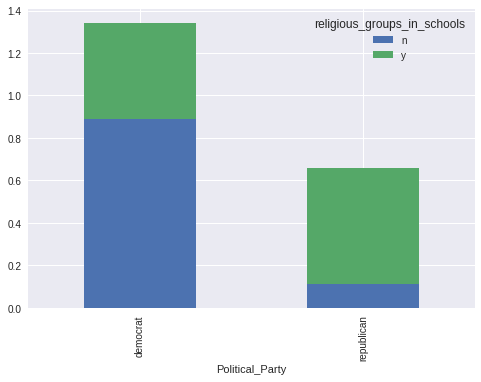

In [101]:
pd.crosstab(df.Political_Party, df.religious_groups_in_schools, normalize='columns').plot(kind='bar', stacked=True)

In [102]:
religious_republican = df[df['Political_Party']=='republican']
religious_republican = religious_republican[['Political_Party', 'religious_groups_in_schools']]
religious_republican.head()

,Political_Party,religious_groups_in_schools
0,republican,y
1,republican,y
7,republican,y
8,republican,y
10,republican,n


In [103]:
religious_democrat = df[df['Political_Party']=='democrat']
religious_democrat = religious_democrat[['Political_Party', 'religious_groups_in_schools']]
religious_democrat.head()

,Political_Party,religious_groups_in_schools
2,democrat,y
3,democrat,y
4,democrat,y
5,democrat,y
6,democrat,y


In [0]:
religious_map = {'y': 1, 'n': 0}
religious_republican['religious_groups_in_schools'] = religious_republican['religious_groups_in_schools'].map(religious_map)
religious_democrat['religious_groups_in_schools'] = religious_democrat['religious_groups_in_schools'].map(religious_map)
                                                                                     

In [105]:
religious_democrat.head()

,Political_Party,religious_groups_in_schools
2,democrat,1.0
3,democrat,1.0
4,democrat,1.0
5,democrat,1.0
6,democrat,1.0


In [0]:
religious_republican.dropna(inplace=True)
religious_democrat.dropna(inplace=True)

religious_republican.religious_groups_in_schools = religious_republican.religious_groups_in_schools.astype('int')
religious_democrat.religious_groups_in_schools = religious_democrat.religious_groups_in_schools.astype('int')


In [108]:
religious_republican.head()

,Political_Party,religious_groups_in_schools
0,republican,1
1,republican,1
7,republican,1
8,republican,1
10,republican,0


In [109]:
scipy.stats.ttest_ind(religious_democrat['religious_groups_in_schools'], religious_republican['religious_groups_in_schools'])

Ttest_indResult(statistic=-9.737575825219457, pvalue=2.393672252059893e-20)

## As the above p-value shows, the Republicans seem to support religion in schools much more than Democrats.

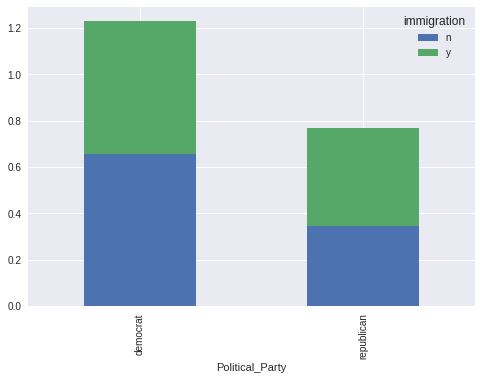

In [112]:
pd.crosstab(df.Political_Party, df.immigration, normalize='columns').plot(kind='bar', stacked=True)

In [113]:
immigration_republican = df[df['Political_Party']=='republican']
immigration_republican = immigration_republican[['Political_Party', 'immigration']]
immigration_republican.head()

,Political_Party,immigration
0,republican,y
1,republican,n
7,republican,n
8,republican,n
10,republican,n


In [114]:
immigration_democrat = df[df['Political_Party']=='democrat']
immigration_democrat = immigration_democrat[['Political_Party', 'immigration']]
immigration_democrat.head()

,Political_Party,immigration
2,democrat,n
3,democrat,n
4,democrat,n
5,democrat,n
6,democrat,n


In [0]:
immigration_map = {'y': 1, 'n': 0}
immigration_republican['immigration'] = immigration_republican['immigration'].map(immigration_map)
immigration_democrat['immigration'] = immigration_democrat['immigration'].map(immigration_map)
                                                                                     

In [116]:
immigration_democrat.head()

,Political_Party,immigration
2,democrat,0.0
3,democrat,0.0
4,democrat,0.0
5,democrat,0.0
6,democrat,0.0


In [0]:
immigration_republican.dropna(inplace=True)
immigration_democrat.dropna(inplace=True)

immigration_republican.immigration = immigration_republican.immigration.astype('int')
immigration_democrat.immigration = immigration_democrat.immigration.astype('int')


In [118]:
immigration_democrat.head()

,Political_Party,immigration
2,democrat,0
3,democrat,0
4,democrat,0
5,democrat,0
6,democrat,0


In [119]:
scipy.stats.ttest_ind(immigration_democrat['immigration'], immigration_republican['immigration'])

Ttest_indResult(statistic=-1.7359117329695164, pvalue=0.08330248490425282)

## As the above p-value shows, we fail to reject the null hypothesis at the 0.05 significance level that there are differences between the two means,  and it seems both Republicans and Democrats have a strong stance on immigration